# 📘 Notebook: `04_neural_network_mnist.ipynb`

## Overview

This notebook introduces **deep learning fundamentals** by training a fully connected neural network on the **MNIST handwritten digits dataset**.

Unlike previous notebooks:
- Features are **not manually engineered**
- The model learns hierarchical representations directly from pixel data
- Training is performed using **backpropagation and gradient-based optimization**

This notebook represents the transition from classical machine learning and GenAI-based reasoning to **modern neural network–based learning**.

## 1. Environment Setup and Data Loading

In this section, we:
- Configure the computation device (CPU)
- Download and prepare the MNIST dataset
- Create data loaders for efficient batch processing

The MNIST dataset is a standard benchmark for image classification and is ideal for introducing neural networks.

Using device: cpu
Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:16<00:00, 611020.39it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 185715.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:04<00:00, 344113.08it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 1086738.66it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



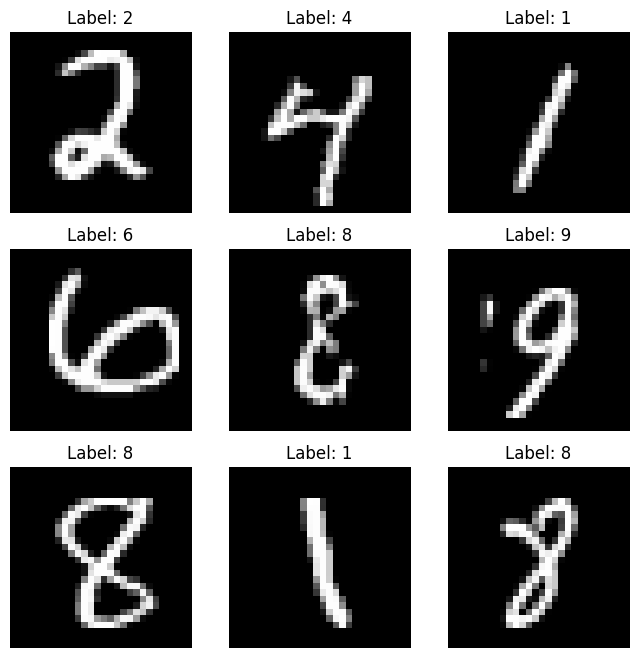

SimpleNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# --- 1. DEVICE CONFIGURATION ---
# We use CPU because no NVIDIA GPU is available in the Docker environment
device = torch.device("cpu")
print(f"Using device: {device}")

# --- 2. DATA LOADING (MNIST) ---
# PyTorch automatically downloads the dataset if not present
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

print("Downloading MNIST dataset...")
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# DataLoader: Loads data in batches to avoid exhausting system memory
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False
)

# --- 3. VISUALIZING THE DATA ---
# Inspect a few examples to understand what we are classifying
dataiter = iter(train_loader)
images, labels = next(dataiter)

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"Label: {labels[i].item()}")
plt.show()

# --- NEURAL NETWORK ARCHITECTURE ---
# Here we define the "brain" of the system
class SimpleNeuralNetwork(nn.Module):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        # Input Layer: 784 neurons (one per pixel: 28x28)
        # Hidden Layer 1: 128 neurons (learn basic shapes: lines, curves)
        # Hidden Layer 2: 64 neurons (learn more complex patterns: loops, crossings)
        # Output Layer: 10 neurons (probability for digits 0–9)
        
        self.flatten = nn.Flatten()  # Converts 28x28 matrix into a 784-length vector
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 128),  # Layer 1
            nn.ReLU(),                # Activation function
            nn.Linear(128, 64),       # Layer 2
            nn.ReLU(),
            nn.Linear(64, 10)         # Output layer (10 possible digits)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = SimpleNeuralNetwork().to(device)
print(model)

### Dataset Inspection

We visualize a small batch of training images to:
- Understand the input data
- Verify labels
- Build intuition about the classification task

Each image represents a grayscale handwritten digit from 0 to 9.


## 2. Neural Network Architecture

Here we define the structure of a **fully connected feedforward neural network**.

The architecture consists of:
- An input layer that receives raw pixel values
- Two hidden layers that learn increasingly complex patterns
- An output layer that produces class scores for each digit

This structure allows the model to learn representations directly from data.

## 3. Training Configuration

To train the neural network, we must define:
- A **loss function** to measure prediction error
- An **optimizer** to update model parameters
- A training loop that performs forward and backward passes

This step introduces the core mechanics behind neural network learning.

In [4]:
# --- 4. DEFINE THE LOSS FUNCTION (How wrong was I?) AND THE OPTIMIZER (How do I improve?) ---
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(dataloader, model, loss_fn, optimizer):
    dataset_size = len(dataloader.dataset)
    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 1. Forward pass (prediction)
        predictions = model(X)
        
        # 2. Compute loss
        loss = loss_fn(predictions, y)

        # 3. Backpropagation (weight updates)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss_value = loss.item()
            current = batch * len(X)
            print(
                f"loss: {loss_value:>7f}  "
                f"[{current:>5d}/{dataset_size:>5d}]"
            )

# --- 5. TRAINING LOOP ---
# We train for 3 epochs (3 full passes over the dataset)
epochs = 3
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)

print("Training completed!")

Epoch 1
-------------------------------
loss: 2.335105  [    0/60000]
loss: 0.535874  [ 6400/60000]
loss: 0.499111  [12800/60000]
loss: 0.259358  [19200/60000]
loss: 0.213122  [25600/60000]
loss: 0.373731  [32000/60000]
loss: 0.239539  [38400/60000]
loss: 0.276984  [44800/60000]
loss: 0.352236  [51200/60000]
loss: 0.357042  [57600/60000]
Epoch 2
-------------------------------
loss: 0.221162  [    0/60000]
loss: 0.121442  [ 6400/60000]
loss: 0.305164  [12800/60000]
loss: 0.353386  [19200/60000]
loss: 0.138048  [25600/60000]
loss: 0.268375  [32000/60000]
loss: 0.288216  [38400/60000]
loss: 0.179421  [44800/60000]
loss: 0.252811  [51200/60000]
loss: 0.184986  [57600/60000]
Epoch 3
-------------------------------
loss: 0.251278  [    0/60000]
loss: 0.119998  [ 6400/60000]
loss: 0.074109  [12800/60000]
loss: 0.101723  [19200/60000]
loss: 0.195673  [25600/60000]
loss: 0.113689  [32000/60000]
loss: 0.106662  [38400/60000]
loss: 0.075049  [44800/60000]
loss: 0.037931  [51200/60000]
loss: 0.05

### Model Summary

The neural network has been instantiated and moved to the selected device.

At this point:
- The model structure is defined
- No learning has occurred yet
- The network is ready to be trained

### Training Progress

The model has been trained for several epochs.

During training:
- The loss progressively decreases
- The network adjusts its internal weights
- Learned representations become more discriminative

The trained model is now ready for evaluation.

## 4. Model Evaluation

In this final step, we evaluate the trained neural network using a **held-out test set**.

Evaluation on unseen data is critical to:
- Measure generalization performance
- Detect overfitting
- Validate the effectiveness of the learned representations


In [5]:
# --- 6. MODEL EVALUATION ---
def test(dataloader, model, loss_fn):
    dataset_size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    
    test_loss, correct = 0.0, 0.0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            # Forward pass
            predictions = model(X)

            # Accumulate loss
            test_loss += loss_fn(predictions, y).item()

            # Count correct predictions
            correct += (
                predictions.argmax(1) == y
            ).type(torch.float).sum().item()

    # Compute average loss and accuracy
    test_loss /= num_batches
    accuracy = correct / dataset_size

    print(
        "Test Error:\n"
        f" Accuracy: {(100 * accuracy):>0.1f}%, "
        f"Avg loss: {test_loss:>8f}\n"
    )

test(test_loader, model, loss_fn)


Test Error:
 Accuracy: 95.6%, Avg loss: 0.136865



### Final Results

The model’s performance is reported using:
- Classification accuracy
- Average test loss

This completes a full deep learning workflow:
data loading → model definition → training → evaluation.

At this stage, the neural network can be further improved by:
- Tuning hyperparameters
- Increasing model depth
- Introducing convolutional layers (CNNs)